In [1]:
import pandas as pd
import os

print("Checking environment variables...")
assert 'PROJ_PATH' in os.environ
assert 'YOLOV7_ROOT_DIR' in os.environ
assert 'DATASET_MD5' in os.environ
assert 'DATASET_ROOT_DIR' in os.environ
assert 'DATA_BUCKET' in os.environ
print("Environment variables exist.")

DATASET_ROOT_DIR = os.environ['DATASET_ROOT_DIR']

Checking environment variables...
Environment variables exist.


In [2]:
train_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, 'competition_train.csv')).drop(columns=['domain'])
test_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, 'competition_test.csv')).drop(columns=['domain'])
val_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, 'competition_val.csv')).drop(columns=['domain'])
train_df.head()

,image_name,BoxesString
0,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...
1,00417fc37a35f14ce3044bf2ae6c76d19bf42a426a9403...,931 370 1002 512;698 935 770 1024;47 51 135 14...
2,004b381a051838dc0cc8ff293e09823faa1dd6f26e82ff...,528 623 567 703;651 421 755 468;282 287 331 42...
3,004ccec5da561b85d8b05ed11c071ac9ef3af5c8c9a1d6...,353 362 440 484;36 326 97 382;199 105 274 172;...
4,006f18cc577457d0d0b987d1af19e5568541cc5f84e143...,4 5 60 43;0 34 18 73;52 63 90 127;259 0 338 68...


In [3]:
from gwhd_format_to_yolo import *

In [4]:
create_yolo_dir_tree()

create_yolo_format_subset(train_df, 'train')
create_yolo_format_subset(test_df, 'test')
create_yolo_format_subset(val_df, 'val')

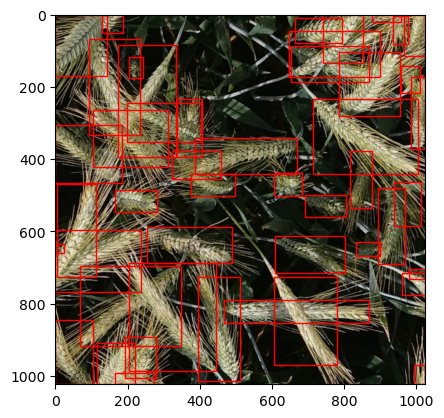

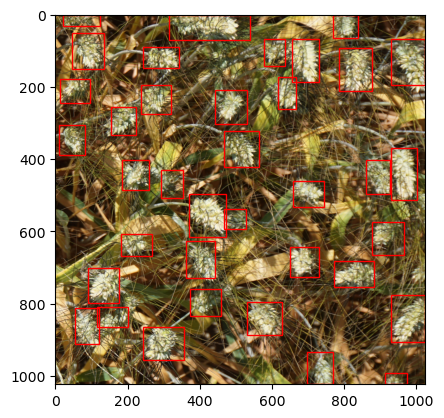

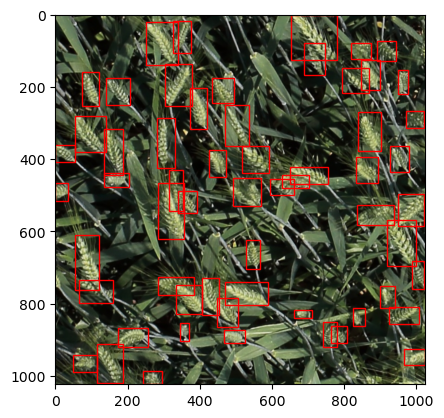

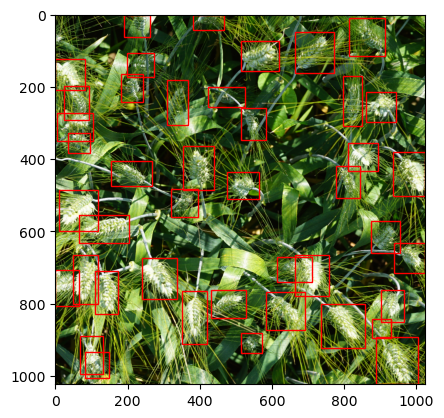

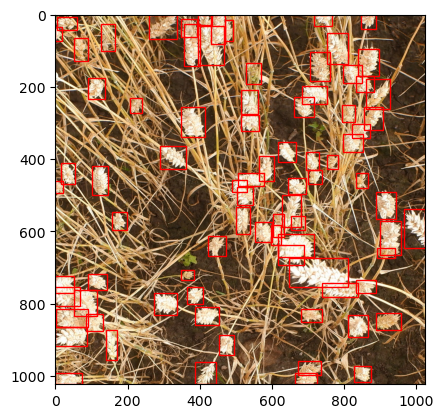

In [5]:
for i in range(5):
    image_name = train_df.iloc[i]['image_name']
    bboxes_gwhd = train_df.iloc[i]['BoxesString'].split(';')
    bboxes_gwhd = [bbox.split(' ') for bbox in bboxes_gwhd]
    bboxes_yolo = [gwhd_coords_to_yolo_coords(*map(int, bbox)) for bbox in bboxes_gwhd]
    plot_bboxes(image_name, bboxes_yolo)